 # Домашнее задание по статистическому анализу на python

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics
import math




 Загрузить датасет по url:


In [84]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)


 World happiness gauged by technologies, social norms, and government policies. Dataset created by PromptCloud's web crawling solution.


 *  **Country (region)** Name of the country.
 *  **Ladder** Cantril Ladder is a measure of life satisfaction.
 *  **SD of Ladder** Standard deviation of the ladder.
 *  **Positive affect** Measure of positive emotion.
 *  **Negative affect** Measure of negative emotion.
 *  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
 *  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
 *  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
 *  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
 *  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
 *  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

 Посмотреть первые несколько рядов таблицы

In [85]:
df[:5]


,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


 Построить частотный график для двух параметров: Freedom и Positive affect. Какое это распределение?

C:\Users\gvs\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\gvs\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


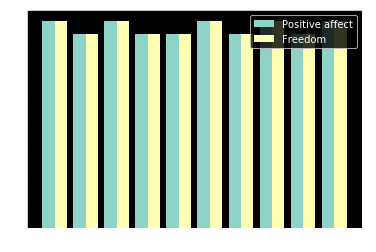

In [86]:
freedom_series_ = df['Freedom']
pa_series_ = df['Positive affect']

plt.hist([pa_series_, freedom_series_], 10, label=['Positive affect', 'Freedom'])
plt.legend()

# Распределение приближается к равномерному



 Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [87]:
def calc_params(name) :
    fd = df[name]
    fd_without_na = fd.dropna()

    median_ = statistics.median(fd)
    mode_ = None
    try :
        mode_ = statistics.mode(fd)
    except statistics.StatisticsError :
        pass
    mean_ = statistics.mean(fd_without_na)
    
    pvariance_ = statistics.pvariance(fd_without_na, mean_)
    pstdev_ = math.sqrt(pvariance_)
    min_ = min(fd)
    max_ = max(fd)
    isnull_ = fd.isnull().sum()
    nulls_ = fd[fd.isnull()]
    range_ = max_ - min_
    return (median_, mode_, mean_, pstdev_, pvariance_, min_, max_, (isnull_, nulls_), range_)

params_ = calc_params('Freedom')
print("Параметры колонки Freedom\n"
    "\tмедиана: {0},\n\tмода: {1},\n\tматематическое ожидание: {2},\n\tстандартное отклонение: {3},\n"
    "\tдисперсия: {4},\n\tминимум: {5},\n\tмаксимум: {6},\n\t выбросы: {7} ({8}),\n\tразмах: {9}.".format(
        params_[0], params_[1], params_[2], params_[3], params_[4],
        params_[5], params_[6], params_[7][0], params_[7][1], params_[8]
        ))



Параметры колонки Freedom
	медиана: 71.0,
	мода: None,
	математическое ожидание: 78.0,
	стандартное отклонение: 44.74371464239419,
	дисперсия: 2002.0,
	минимум: 1.0,
	максимум: 155.0,
	 выбросы: 1 (28   NaN
Name: Freedom, dtype: float64),
	размах: 154.0.


 Посмотреть корреляцию между Freedom и Positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

Коэффициент Пирсона:  0.6817698430601656


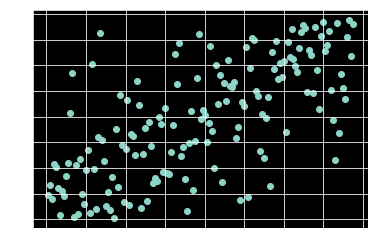

In [88]:
plt.grid(True)
plt.scatter(freedom_series_, pa_series_)

# отбрасываем нулевые значения в последовотельностях
cp, _ = sts.pearsonr(freedom_series_.dropna(), pa_series_.dropna())
print("Коэффициент Пирсона: ", cp)

# Коэффициент говорит о довольно коррелируемых данных


 Нормализовать данные колонки Freedom (централизация + масштабирование)

In [89]:
from sklearn import preprocessing

normalized_freedom = freedom_series_ - freedom_series_.mean()
scaler = preprocessing.MinMaxScaler((-1, 1))
normalized_freedom = scaler.fit_transform(np.array(normalized_freedom).reshape(-1,1))
normalized_freedom




array([[-0.94805195],
       [-0.93506494],
       [-0.97402597],
       [-0.92207792],
       [-0.76623377],
       [-0.87012987],
       [-0.88311688],
       [-0.90909091],
       [-0.8961039 ],
       [-0.67532468],
       [-0.79220779],
       [-0.80519481],
       [ 0.19480519],
       [-0.64935065],
       [-0.19480519],
       [-0.58441558],
       [-0.44155844],
       [-0.32467532],
       [-0.20779221],
       [-0.25974026],
       [-0.96103896],
       [-0.85714286],
       [-0.09090909],
       [-0.11688312],
       [ 0.31168831],
       [ 0.25974026],
       [-0.68831169],
       [-0.12987013],
       [        nan],
       [ 0.22077922],
       [-0.5974026 ],
       [ 0.07792208],
       [-0.62337662],
       [-0.75324675],
       [-0.05194805],
       [ 0.7012987 ],
       [-0.7012987 ],
       [ 0.38961039],
       [-0.35064935],
       [-0.33766234],
       [-1.        ],
       [ 0.57142857],
       [-0.28571429],
       [-0.84415584],
       [-0.1038961 ],
       [-0

 Построить матрицу корреляций для всех колонок таблицы

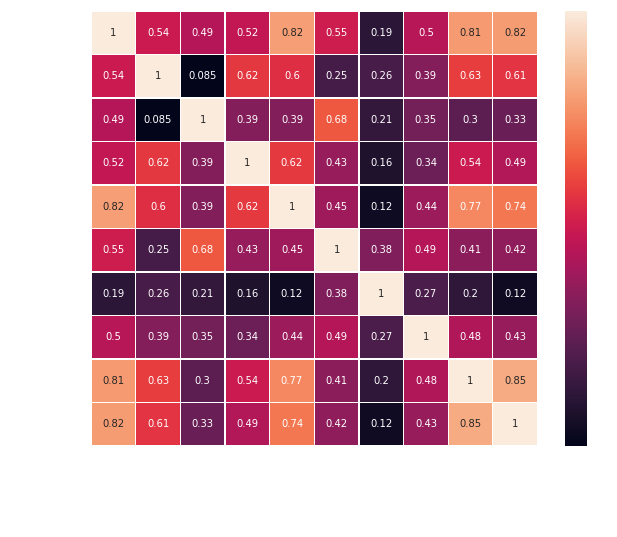

In [90]:
import seaborn as sns

cm = df.corr()
sns.heatmap(cm, annot=True, cmap='rocket', linewidths=0.2)
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.show()



 Загрузить следующую таблицу:

In [91]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
df=pd.read_csv(url)
df[:3]


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


 Сделать частотный график колонки AveragePrice. Какое это распределение?

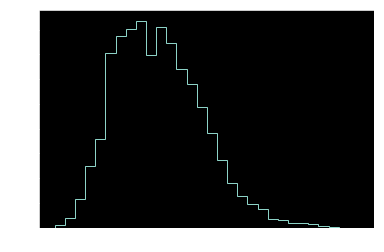

In [92]:
ap_ = df['AveragePrice']

plt.hist(ap_, 30, histtype='step')
plt.show()

# распределение похоже на нормальное


 Найти корреляцию в следующих колонках:

 Корелляция между: 4046 - Total number of avocados with PLU 4046 sold  и например Average Price. Если корелляция есть, то скорее всего, данный вид авокадо дорогой по цене и он влияет на среднюю стоимость.

In [93]:
clmn_4046 = df['4046']
clmn_average_price = df['AveragePrice']

cp, _ = sts.pearsonr(clmn_4046, clmn_average_price)
cp

# корреляция отрицательна и незначительна ~20%


-0.20831704848788477